# Предсказание ранней повторной госпитализации
Задания:

0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор (регрессию) ближайших соседей или другой (аргументировать свой выбор)
8. Подобрать оптимальное значение к-ва ближайших соседей (или другого релевантного гиперпараметра) 9. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы
9. По желанию: запустить другие классификаторы. Сравнить результаты
10. По желанию: как-то побороться с несбалансированностью классов (если она есть)
11. По желанию: исключить коррелированные переменные (объяснить зачем)
12. Сделать общие выводы

# Описание задачи

Задача заключается в прогнозировании повторной госпитализации пациента на основе данных о диабете.

Датасет [_Diabetes 130-US hospitals for years 1999-2008 Data Set_](https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008#) представляет информацию о клинической помощи, оказанной в течение 10 лет в 130 больницах США. Он содержит 50 характеристик, описывающих данные о больницах и результаты лечения пациентов.

Показатели ранней повторной госпитализации могут служить важным показателем качества лекарственной терапии и систем здравоохранения в целом. Частая повторная госпитализация обычно указывает на неэффективность применяемых лекарственных препаратов и методов лечения.

Цель данного проекта заключается в разработке модели, способной предсказывать вероятность ранней повторной госпитализации (в течение месяца). 

## входные признаки

### Числовые признаки:
    encounter_id - уникальный идентификатор приема
    patient_nbr - уникальный идентификатор пациента
    time_in_hospital - число дней между поступлением и выпиской
    num_lab_procedures - количество лабораторных тестов, проведенных во время приема
    num_procedures - количество процедур (кроме лабораторных тестов), проведенных во время приема
    num_medications - количество препаратов, назначенных во время приема
    number_outpatient - количество амбулаторных посещений пациента за год, предшествующий приему
    number_emergency - количество экстренных посещений пациента за год, предшествующий приему
    number_inpatient - количество стационарных посещений пациента за год, предшествующий приему
    number_diagnoses - количество диагнозов, введенных в систему
    
### категориальные признаки
    race - расовая принадлежность (принимаемые значения: Caucasian, Asian, African American, Hispanic, and other)
    gender - пол (принимаемые значения: male, female, unknown/invalid)
    age - возраст (значения сгруппированы с интервалом в 10 лет: [0-10), [10-20), ..., [90-100))
    weight - вес в фунтах (значения сгруппированы с интервалом в 25 фунтов: [0-25), ... [175-200), >200)
    admission_type - тип посещения (принимает 9 различных значений, например, emergency, urgent, elective, newborn и др.)
    discharge_disposition - расположение пациента на момент выписки (принимает 29 различных значений, например, discharged to home, expired и др.)
    admission_source - источник обращения (принимает 21 различное значение, например, physician referral, emergency room и др.)
    payer_code - код плательщика, покрывающего медицинские расходы (соответствует 23 различным значениям, например, Medicare, self-pay и др.)
    medical_specialty - медицинская специальность принимающего врача (соответствует 84 различным значениям, например, cardiology, surgeon и др.)
    diag_1 - первичный диагноз (кодируется первыми тремя цифрами МКБ9 и принимает 848 различных значений)
    diag_2 - вторичный диагноз (кодируется первыми тремя цифрами МКБ9 и принимает 923 различных значения)
    diag_3 - дополнительный вторичный диагноз (кодируется первыми тремя цифрами МКБ9 и принимает 954 различных значения)
    max_glu_serum - диапазон результата теста на глюкозу в сыворотке крови (значения: None, >200, >300, Norm)
    A1Cresult - диапазон результата теста A1C (тест на гемоглобин) (значения: None, >7, >8, Norm)
    change - признак, показывающий было ли изменение лекарств от диабета (либо дозировки, либо препарата) (значения: change, no change)
    diabetesMed - признак, показывающий были ли назначены лекарства от диабета (значения: yes, no)
    metformin, ..., metformin-pioglitazone - 24 признака, показывающих был ли назначен соответствующий препарат или произошло ли изменение дозировки (значения: up (если увеличили дозировку), down (если уменьшили дозировку), steady (если дозировку не меняли), no (если препарат не был назначен))
    
### выходной признак
    readmitted - категориальный признак, показывающий число дней до повторной госпитализации в стационар (принимаемые значения: <30_ (если пациент был повторно госпитализирован менее чем за 30 дней), _>30 (если пациент был повторно госпитализирован более чем за 30 дней), No (для отсутствия записи о повторной госпитализации))

# прочтем данные

In [86]:
import pandas as pd
import seaborn as sns
import numpy as np
!pip install category_encoders
import category_encoders as ce  # библиотека для кодирования категориальных признаков
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
url = 'https://raw.githubusercontent.com/Falirchik/ML/main/diabetic_data.csv'
df = pd.read_csv(url, low_memory=False)

df.shape

(101766, 50)

Датасет состоит из 101766 записей и 50 признаков.

Отобразим записи в виде таблицы. Отобразим лишь часть (первые 10 записей), для удобства восприятия (ввиду большого количества признаков) транспонируем эту таблицу.

In [88]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type,NaN,Emergency,Emergency,Emergency,Emergency,Urgent,Elective,Emergency,Urgent,Elective
discharge_disposition,Not Mapped,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged/transferred to SNF
admission_source,Physician Referral,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Clinic Referral,Clinic Referral,Emergency Room,Transfer from a hospital,Transfer from a hospital
time_in_hospital,1,3,2,2,1,3,4,5,13,12


Данные состоят из числовых и категориальных признаков. Имеются пропущенные значения. 
Проведем дополнительную предобработку данных.
# список признаков

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type            96475 non-null   object
 7   discharge_disposition     98075 non-null   object
 8   admission_source          94985 non-null   object
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [90]:
for column in df.select_dtypes(['object']):
    df[column] = df[column].astype('category')

df.dtypes

encounter_id                   int64
patient_nbr                    int64
race                        category
gender                      category
age                         category
weight                      category
admission_type              category
discharge_disposition       category
admission_source            category
time_in_hospital               int64
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
c

# Описание задачи

Предсказание ранней повторной госпитализации. Признак readmitted показывает число дней до повторной госпитализации. Т.к. в данной задаче важна именно ранняя госпитализация, то можно объединить значения >30 и No в единое значение и заменить его на NO, а значение <30 - на YES, тем самым сведя задачу к бинарной классификации.

In [91]:
df['readmitted'].unique()  # число уникальных значений признака readmitted

['NO', '>30', '<30']
Categories (3, object): ['<30', '>30', 'NO']

In [92]:
df['readmitted'] = df['readmitted'].replace('<30', 'YES').replace('>30', 'NO')

df['readmitted'].unique()

['NO', 'YES']
Categories (2, object): ['YES', 'NO']

In [93]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type,NaN,Emergency,Emergency,Emergency,Emergency,Urgent,Elective,Emergency,Urgent,Elective
discharge_disposition,Not Mapped,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged/transferred to SNF
admission_source,Physician Referral,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Clinic Referral,Clinic Referral,Emergency Room,Transfer from a hospital,Transfer from a hospital
time_in_hospital,1,3,2,2,1,3,4,5,13,12


# визуализация и предварительный анализ
Избавимся от идентификаторов пациента и приема, потому что в нашей задаче они не имеют смысла

In [94]:
df.drop(['patient_nbr', 'encounter_id'], axis=1, inplace=True)

df.shape

(101766, 48)

# статистика матрицы данных
## инфорамция о категориальных признаках


In [95]:
df.describe(include=['category']).T

,count,unique,top,freq
race,99493,5,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,3197,9,[75-100),1336
admission_type,96475,7,Emergency,53990
discharge_disposition,98075,25,Discharged to home,60234
admission_source,94985,16,Emergency Room,57494
payer_code,61510,17,MC,32439
medical_specialty,51817,72,InternalMedicine,14635
diag_1,101745,716,428,6862


Видим два признака, что принимают уникальное значение: examide, citoglipton. Так как у них единственное значение, то можем их убрать, они не будут никак влиять на задачу.

In [96]:
df.drop(['examide', 'citoglipton'], axis=1, inplace=True)

df.shape

(101766, 46)

# числовые признаки

In [98]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
race,99493,5,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101766,3,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,3197,9,[75-100),1336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type,96475,7,Emergency,53990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discharge_disposition,98075,25,Discharged to home,60234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_source,94985,16,Emergency Room,57494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_in_hospital,101766.0,NaN,NaN,NaN,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
payer_code,61510,17,MC,32439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medical_specialty,51817,72,InternalMedicine,14635,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   race                      99493 non-null   category
 1   gender                    101766 non-null  category
 2   age                       101766 non-null  category
 3   weight                    3197 non-null    category
 4   admission_type            96475 non-null   category
 5   discharge_disposition     98075 non-null   category
 6   admission_source          94985 non-null   category
 7   time_in_hospital          101766 non-null  int64   
 8   payer_code                61510 non-null   category
 9   medical_specialty         51817 non-null   category
 10  num_lab_procedures        101766 non-null  int64   
 11  num_procedures            101766 non-null  int64   
 12  num_medications           101766 non-null  int64   
 13  number_outpatient         101

In [100]:
missing_data = df.isnull()
missing_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
race,False,False,False,False,False,False,False,False,False,False
gender,False,False,False,False,False,False,False,False,False,False
age,False,False,False,False,False,False,False,False,False,False
weight,True,True,True,True,True,True,True,True,True,True
admission_type,True,False,False,False,False,False,False,False,False,False
discharge_disposition,False,False,False,False,False,False,False,False,False,False
admission_source,False,False,False,False,False,False,False,False,False,False
time_in_hospital,False,False,False,False,False,False,False,False,False,False
payer_code,True,True,True,True,True,True,True,True,True,True
medical_specialty,False,True,True,True,True,True,True,True,True,False


True - представляет собой отсутвующее значение в каждом из столбцов. Подсчитаем их.


In [101]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

race
race
False    99493
True      2273
Name: count, dtype: int64
 
gender
gender
False    101766
Name: count, dtype: int64
 
age
age
False    101766
Name: count, dtype: int64
 
weight
weight
True     98569
False     3197
Name: count, dtype: int64
 
admission_type
admission_type
False    96475
True      5291
Name: count, dtype: int64
 
discharge_disposition
discharge_disposition
False    98075
True      3691
Name: count, dtype: int64
 
admission_source
admission_source
False    94985
True      6781
Name: count, dtype: int64
 
time_in_hospital
time_in_hospital
False    101766
Name: count, dtype: int64
 
payer_code
payer_code
False    61510
True     40256
Name: count, dtype: int64
 
medical_specialty
medical_specialty
False    51817
True     49949
Name: count, dtype: int64
 
num_lab_procedures
num_lab_procedures
False    101766
Name: count, dtype: int64
 
num_procedures
num_procedures
False    101766
Name: count, dtype: int64
 
num_medications
num_medications
False    101766
Name: count,

In [102]:
df.isnull().sum()

race                         2273
gender                          0
age                             0
weight                      98569
admission_type               5291
discharge_disposition        3691
admission_source             6781
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

По таблице заметно отсутствие каких-либо выбивающихся значений.

Рассмотрим сбалансированность/несбалансированность классов.

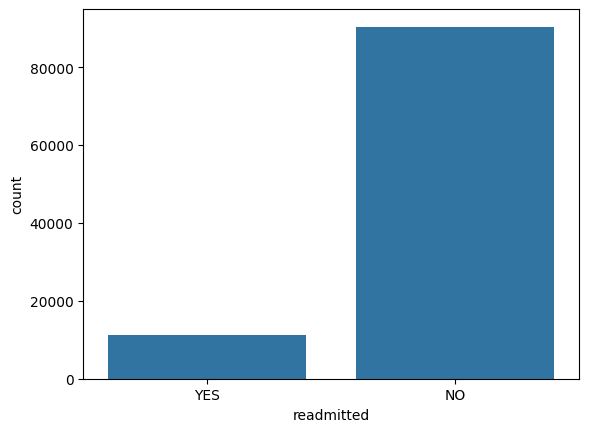

In [103]:
sns.countplot(x='readmitted', data=df)
pass

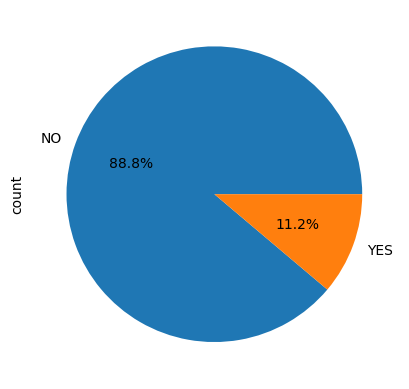

In [104]:
df['readmitted'].value_counts()/len(df)
counts = df['readmitted'].value_counts()

percentages = counts * 100 / len(df)

fig, ax = plt.subplots()
percentages.plot(kind='pie', ax=ax, autopct='%1.1f%%')
plt.show()

Очевидно, что классы несбалансированы. В дальнейшем стоит попытаться устранить эту несбалансированность.

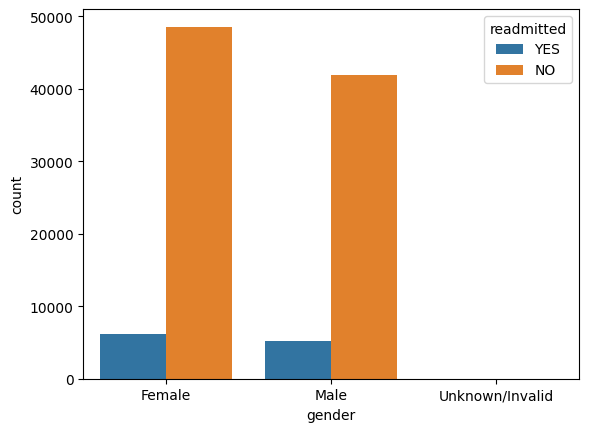

In [105]:
sns.countplot(x='gender', order=df['gender'].value_counts().index, hue='readmitted', data=df)
pass

In [106]:
rows_with_invalid_gender = df[df['gender'] == 'Unknown/Invalid']  # строки с невалидными значениями признака gender

len(rows_with_invalid_gender)  # число таких строк

3

В датасете очевидно видно преобладание женщин. так же имеется 3 записи с невалидным значением. так как этих записей всего 3, то мы можем их удалить


In [107]:
df.drop(rows_with_invalid_gender.index, axis=0, inplace=True)

len(df[df['gender'] == 'Unknown/Invalid'])  # число строк с невалидными значениями признака gender после удаления

0

Рассмотрим возраст повторногоспитализируемых


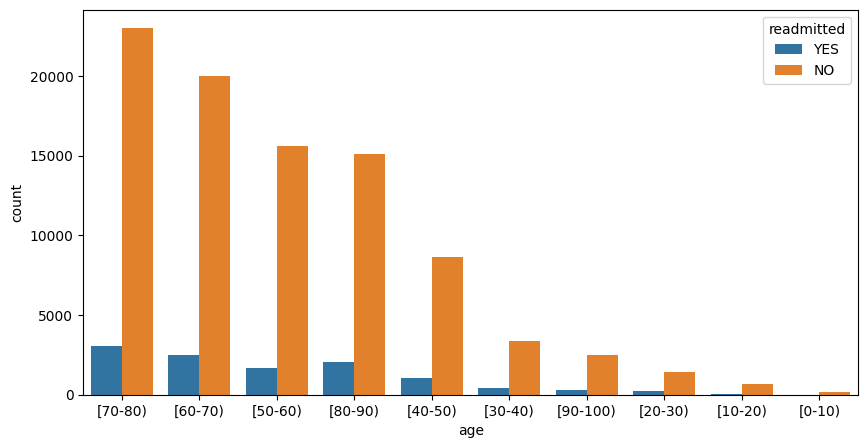

In [108]:
plt.figure(figsize=(10, 5))
sns.countplot(x='age', order=df['age'].value_counts().index, hue='readmitted', data=df)
pass

Пожилые - наиболее частая группа пациентов, независимо от того, был ли пациент повторногоспитализирован.

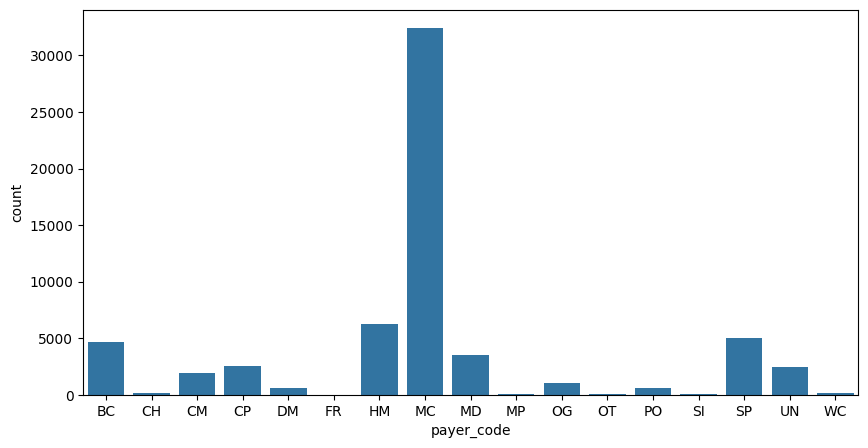

In [109]:
plt.figure(figsize=(10, 5))
sns.countplot(x='payer_code', data=df)
pass

Самый популярный способ оплаты медуслуг - MC (медицинская страховка для лиц от 65 лет и старше)

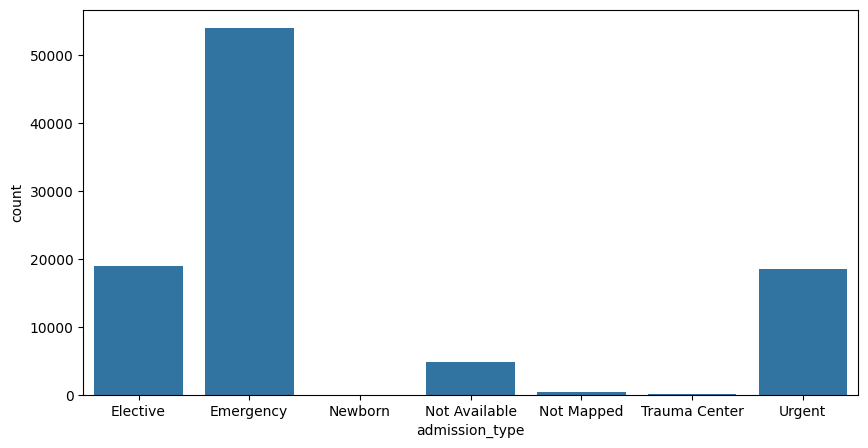

In [110]:
plt.figure(figsize=(10, 5))
sns.countplot(x='admission_type', data=df)
pass

Наибольшее число обращений - неотложные.

In [116]:
df['A1Cresult_NaN'] = np.where(df['A1Cresult'].isnull(), 0,1)
df['max_glu_serum_NaN'] = np.where(df['max_glu_serum'].isnull(), 0,1)
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type,NaN,Emergency,Emergency,Emergency,Emergency,Urgent,Elective,Emergency,Urgent,Elective
discharge_disposition,Not Mapped,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged/transferred to SNF
admission_source,Physician Referral,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Clinic Referral,Clinic Referral,Emergency Room,Transfer from a hospital,Transfer from a hospital
time_in_hospital,1,3,2,2,1,3,4,5,13,12
payer_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medical_specialty,Pediatrics-Endocrinology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InternalMedicine


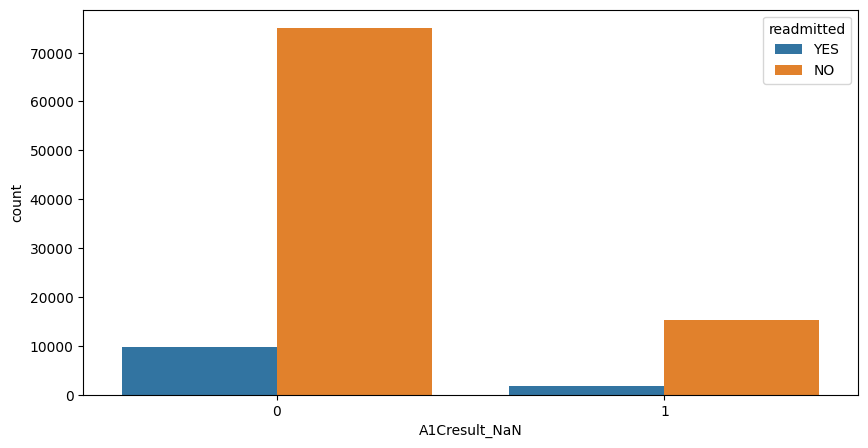

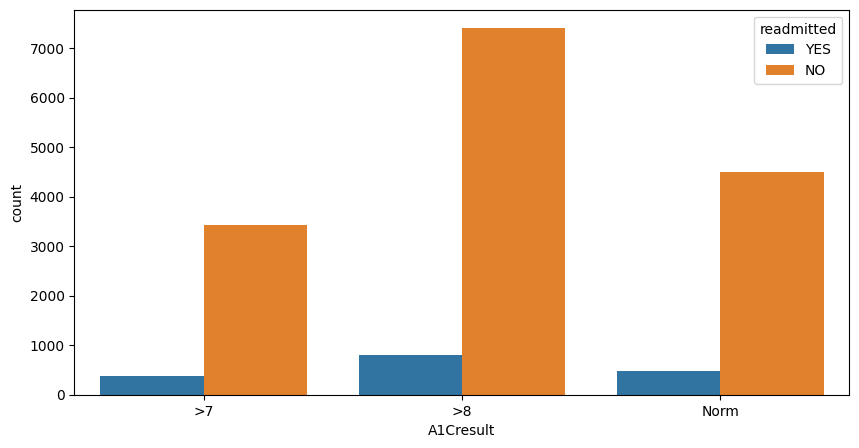

In [115]:
plt.figure(figsize=(10, 5))
sns.countplot(x='A1Cresult_NaN', hue='readmitted', data=df)
pass

plt.figure(figsize=(10, 5))
sns.countplot(x='A1Cresult', hue='readmitted', data=df)
pass

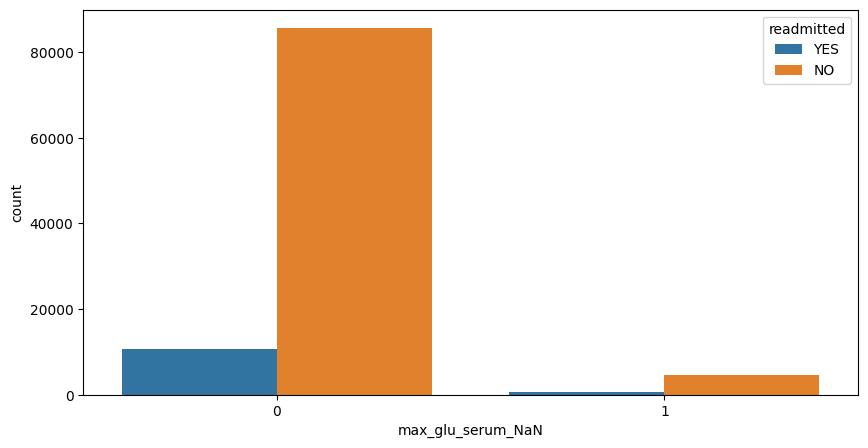

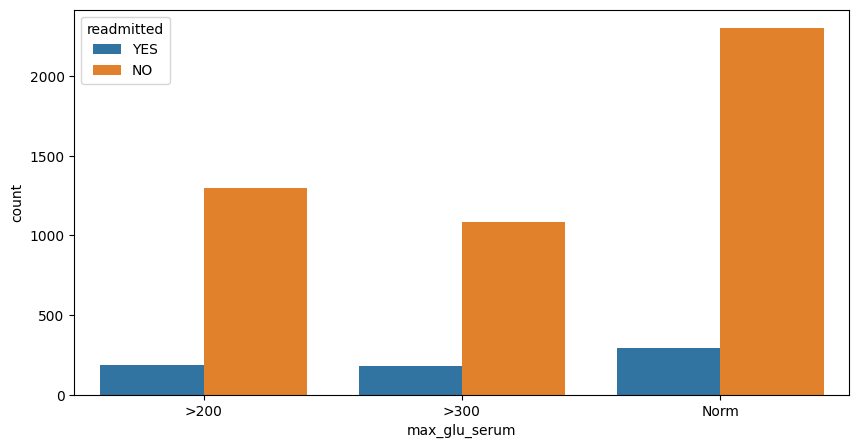

In [117]:
plt.figure(figsize=(10, 5))
sns.countplot(x='max_glu_serum_NaN', hue='readmitted', data=df)
pass

plt.figure(figsize=(10, 5))
sns.countplot(x='max_glu_serum', hue='readmitted', data=df)
pass

Подавляющему большинству пациентов не делали тесты ни на гемоглобин (А1С), ни на глюкозу. Удалим признаки, которые специально добавили для этих графиков.

In [118]:
df.drop(['max_glu_serum_NaN', 'A1Cresult_NaN'], axis=1, inplace=True)

df.shape

(101763, 46)

Построим графики зависимостей каждого количественного признака с каждым

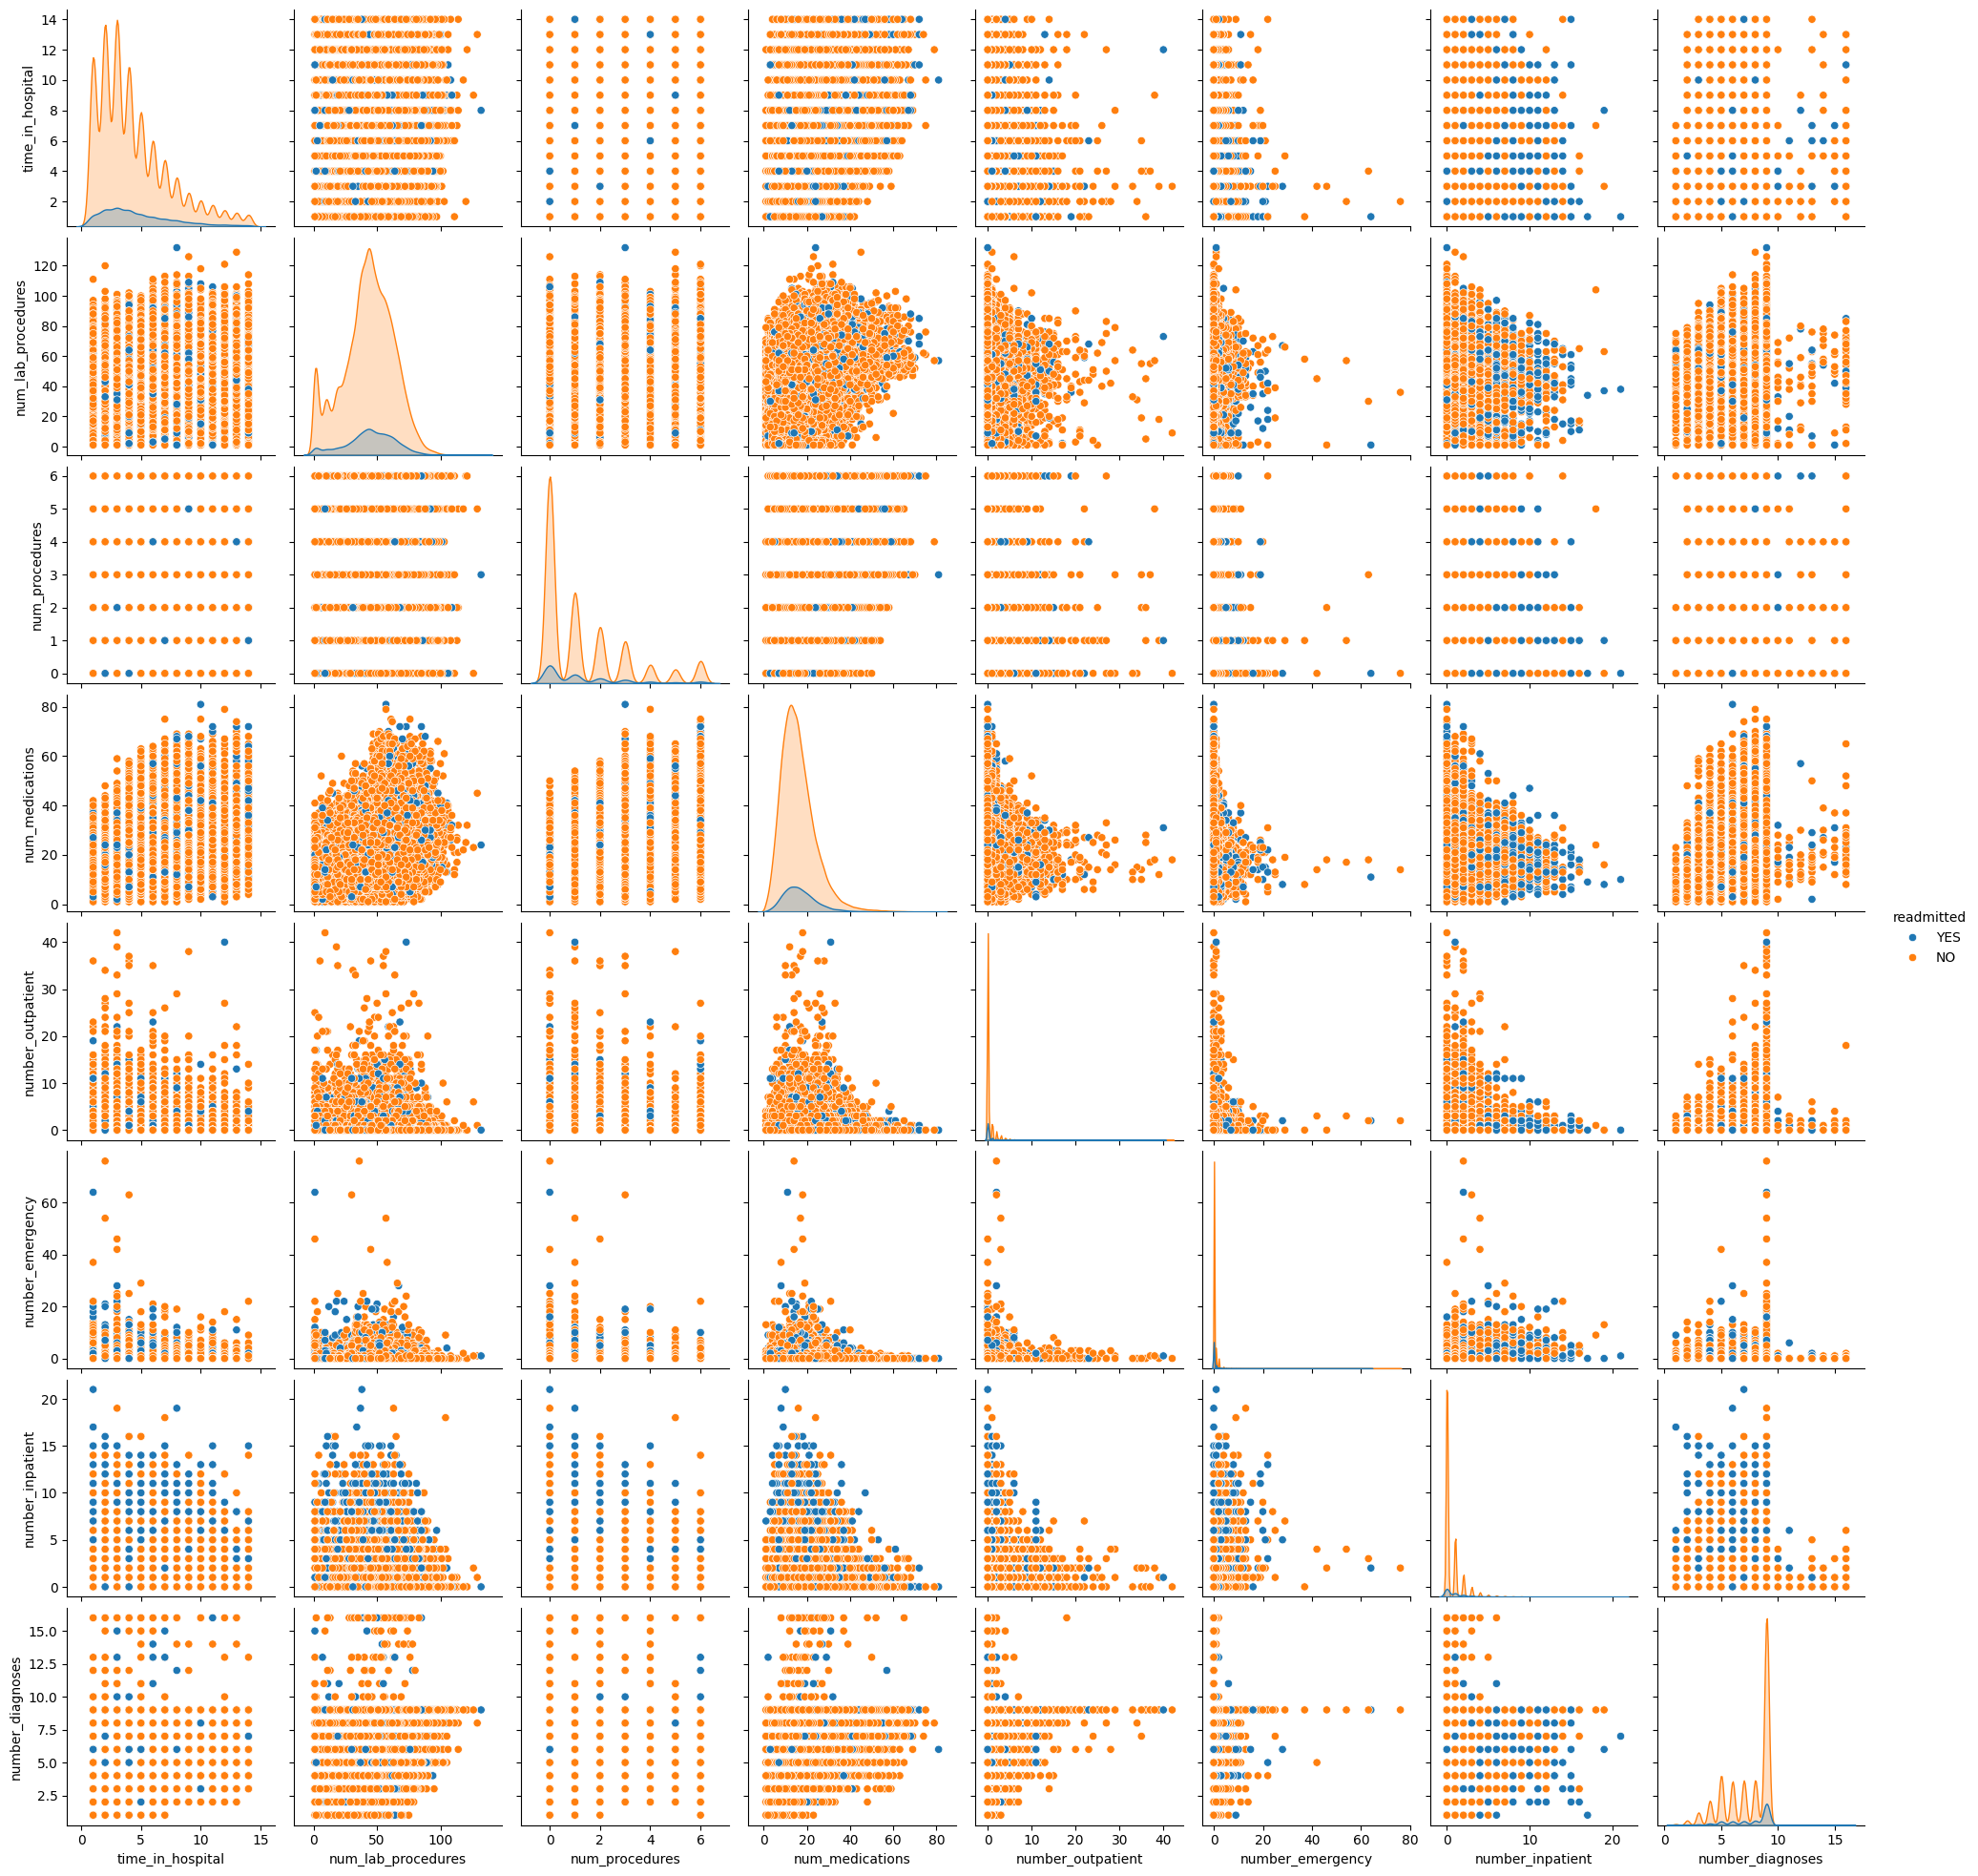

In [119]:
sns.pairplot(df, hue='readmitted')

Вычислим матрицу корреляции для всех признаков, временно факторизовав категориальные

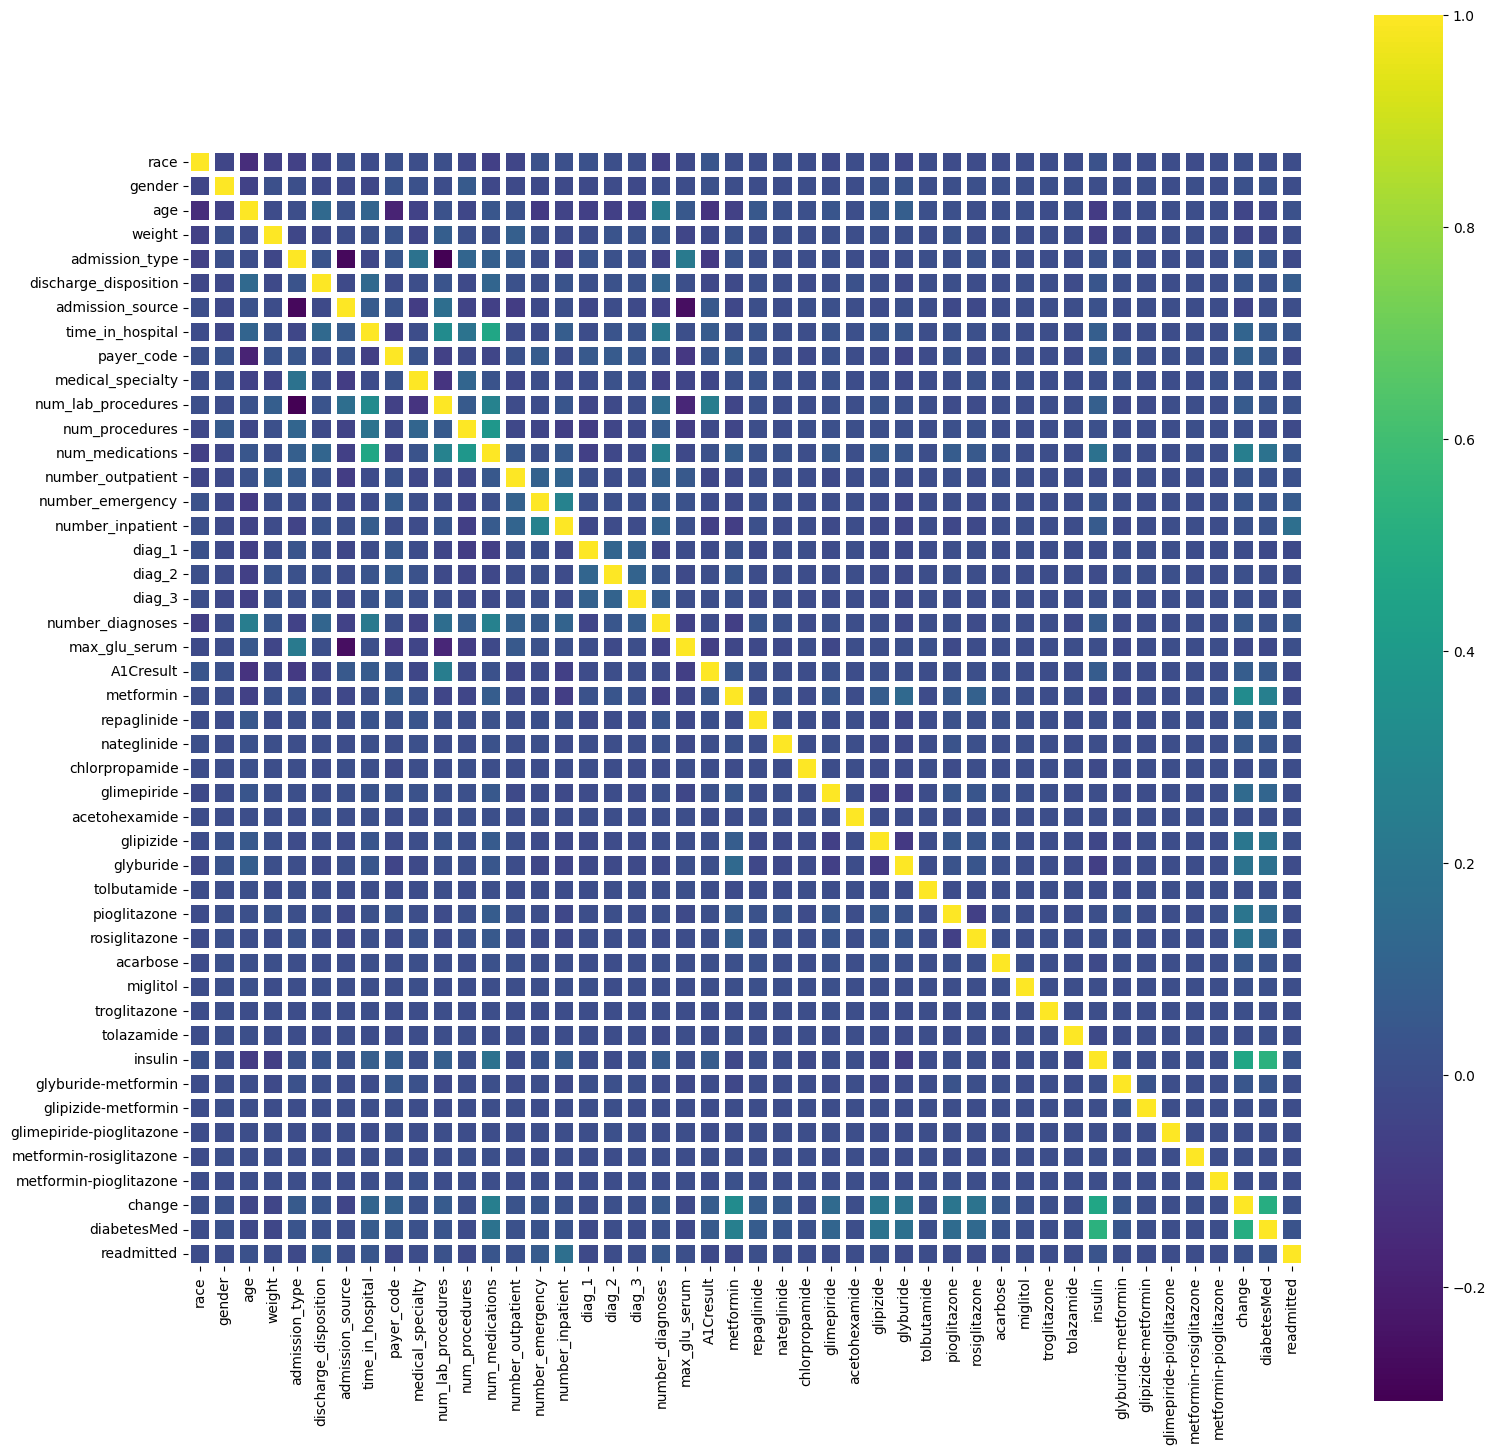

In [123]:
df_f = df.copy()
for column in df_f.select_dtypes(['category']):
    df_f[column] = pd.factorize(df_f[column])[0]

corr_mat_f = df_f.corr()

plt.figure(figsize=(18, 18))
sns.heatmap(corr_mat_f, cmap= 'viridis', linewidths=3, linecolor='white', square=True)
pass

Сильно скоррелированных признаков нет. Поищем пары признаков, для которых коэффициент корреляции больше некоторого значения.

In [124]:
corr_mat_f.where(np.triu(corr_mat_f > 0.35, k=1)).stack().sort_values(ascending=False)

insulin           diabetesMed        0.528249
change            diabetesMed        0.506360
insulin           change             0.468251
time_in_hospital  num_medications    0.466137
num_procedures    num_medications    0.385761
dtype: float64

Хотя у признаков нет сильной связи, можно сказать, что существует средняя взаимосвязь между insulin, change и diabetesMed. Это обусловлено тем, что инсулин обычно назначается как лекарство для лечения диабета. Также можно наблюдать связь между time_in_hospital и num_medications. Чем дольше пациент находится в больнице (по разным причинам, оставаясь при этом пациентом), тем больше лекарств ему требуется для выздоровления. Аналогичная ситуация со взаимосвязью между num_procedures и num_medications.
# обработка пропущенных значений
Где-то выше уже была оценка пропущенных значений, но сделаем это снова и разберемся с ними

In [125]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

weight                      96.858387
max_glu_serum               94.746617
A1Cresult                   83.276829
medical_specialty           49.081690
payer_code                  39.557600
admission_source             6.663522
admission_type               5.199336
discharge_disposition        3.627055
race                         2.231656
diag_3                       1.398347
diag_2                       0.351798
diag_1                       0.020636
acarbose                     0.000000
miglitol                     0.000000
troglitazone                 0.000000
rosiglitazone                0.000000
pioglitazone                 0.000000
tolazamide                   0.000000
glyburide-metformin          0.000000
insulin                      0.000000
glyburide                    0.000000
glipizide-metformin          0.000000
glimepiride-pioglitazone     0.000000
metformin-rosiglitazone      0.000000
metformin-pioglitazone       0.000000
change                       0.000000
diabetesMed 

Видим очень сильный разброс по пропущенным значениям. Некоторые достигат больше 90%. Такие мы восстановить не сможем. 
Так же есть признаки, где пропущенных значений меньше 3%. Из таблицы можно удалить эти строки, в которых находятся пропущенные значения

In [126]:
df.dropna(subset=['race', 'diag_3', 'diag_2', 'diag_1'], inplace=True)
df.shape

(98052, 46)

Так же удалим признак payer_code, ведь он, очевидно, не несет никакой смысловой нагрузки для нашей задачи, а пропущенных значений в нем почти 40%. Для нас данный признак не существенный.

Удалим и признак weight, так как он отсутвует практически в 97% процентов случаев и его восстановить просто невозможно.

In [128]:
df.drop(['payer_code'], axis=1, inplace=True)
df.shape

(98052, 45)

In [129]:
df.drop(['weight'], axis=1, inplace=True)
df.shape

(98052, 44)

Для признаков admission_source и admission_type есть специальное значение 'Not Available', на которое можно заменить пропущенные значения

In [130]:
df['admission_source'].fillna('Not Available', inplace=True)
df['admission_type'].fillna('Not Available', inplace=True)

А для оставшихся признаков discharge_disposition и medical_specialty имеет смысл специально добавить значение 'Not Available', на которое заменим пропущенные значения

In [131]:
df['discharge_disposition'] = df['discharge_disposition'].cat.add_categories('Not Available')
df['discharge_disposition'].fillna('Not Available', inplace=True)

df['medical_specialty'] = df['medical_specialty'].cat.add_categories('Not Available')
df['medical_specialty'].fillna('Not Available', inplace=True)

In [132]:

(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

max_glu_serum               94.688533
A1Cresult                   83.485294
race                         0.000000
miglitol                     0.000000
acetohexamide                0.000000
glipizide                    0.000000
glyburide                    0.000000
tolbutamide                  0.000000
pioglitazone                 0.000000
rosiglitazone                0.000000
acarbose                     0.000000
troglitazone                 0.000000
chlorpropamide               0.000000
tolazamide                   0.000000
insulin                      0.000000
glyburide-metformin          0.000000
glipizide-metformin          0.000000
glimepiride-pioglitazone     0.000000
metformin-rosiglitazone      0.000000
metformin-pioglitazone       0.000000
change                       0.000000
diabetesMed                  0.000000
glimepiride                  0.000000
nateglinide                  0.000000
gender                       0.000000
repaglinide                  0.000000
age         

остались только признаки с тестами на глюкозу и А1С. Их мы тоже заменим на Not Available

In [133]:
df['A1Cresult'] = df['A1Cresult'].cat.add_categories('Not Available')
df['A1Cresult'].fillna('Not Available', inplace=True)

df['max_glu_serum'] = df['max_glu_serum'].cat.add_categories('Not Available')
df['max_glu_serum'].fillna('Not Available', inplace=True)

хочу и пересчитаю предудыщие визуализаторы для этих тестов

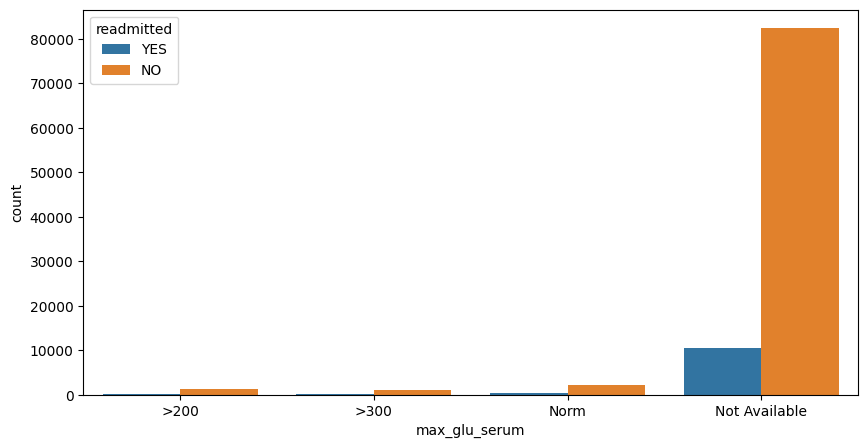

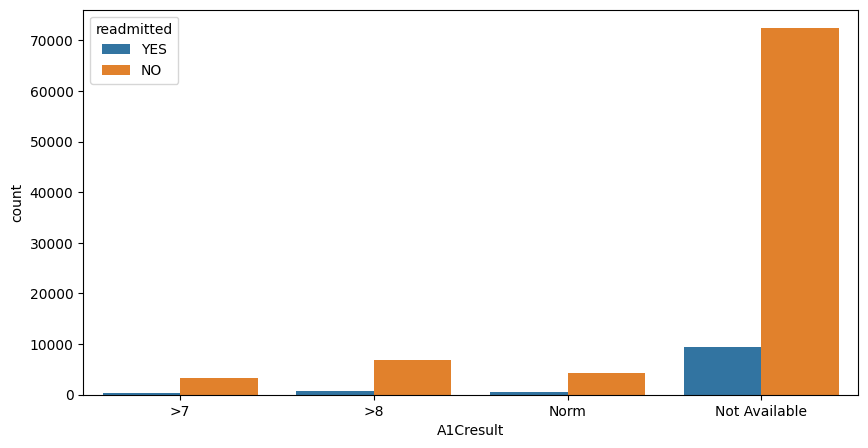

In [134]:
plt.figure(figsize=(10, 5))
sns.countplot(x='max_glu_serum', hue='readmitted', data=df)
pass

plt.figure(figsize=(10, 5))
sns.countplot(x='A1Cresult', hue='readmitted', data=df)
pass

Вот теперь красивое

In [136]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

race                        0.0
gender                      0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
pioglitazone                0.0
rosiglitazone               0.0
acarbose                    0.0
miglitol                    0.0
troglitazone                0.0
tolazamide                  0.0
insulin                     0.0
glyburide-metformin         0.0
glipizide-metformin         0.0
glimepiride-pioglitazone    0.0
metformin-rosiglitazone     0.0
metformin-pioglitazone      0.0
change                      0.0
diabetesMed                 0.0
chlorpropamide              0.0
nateglinide                 0.0
repaglinide                 0.0
num_medications             0.0
age                         0.0
admission_type              0.0
discharge_disposition       0.0
admission_source            0.0
time_in_hospital            0.0
medical_specialty           0.0
num_lab_

In [137]:
df.describe(include=['category']).T

,count,unique,top,freq
race,98052,5,Caucasian,75079
gender,98052,2,Female,52833
age,98052,10,[70-80),25305
admission_type,98052,7,Emergency,52178
discharge_disposition,98052,26,Discharged to home,57609
admission_source,98052,16,Emergency Room,55951
medical_specialty,98052,73,Not Available,48318
diag_1,98052,713,428,6730
diag_2,98052,740,428,6517
diag_3,98052,786,250,11208


И вот у нас снова есть признак с уникальным значением. Можем убрать его из таблицы

In [138]:
df.drop(['metformin-rosiglitazone'], axis=1, inplace=True)

df.shape

(98052, 43)